# Comparison of precipitation from evaporation versus scaling from desalination

## Evaporation

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 14 significant figures requested from number with only 13 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))



Estimated completion in 2.20E1 seconds by 2021-10-26 15:54:46.371860 local time.
C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PHREEQC\ROSS\rosspy\databases\pitzer.dat


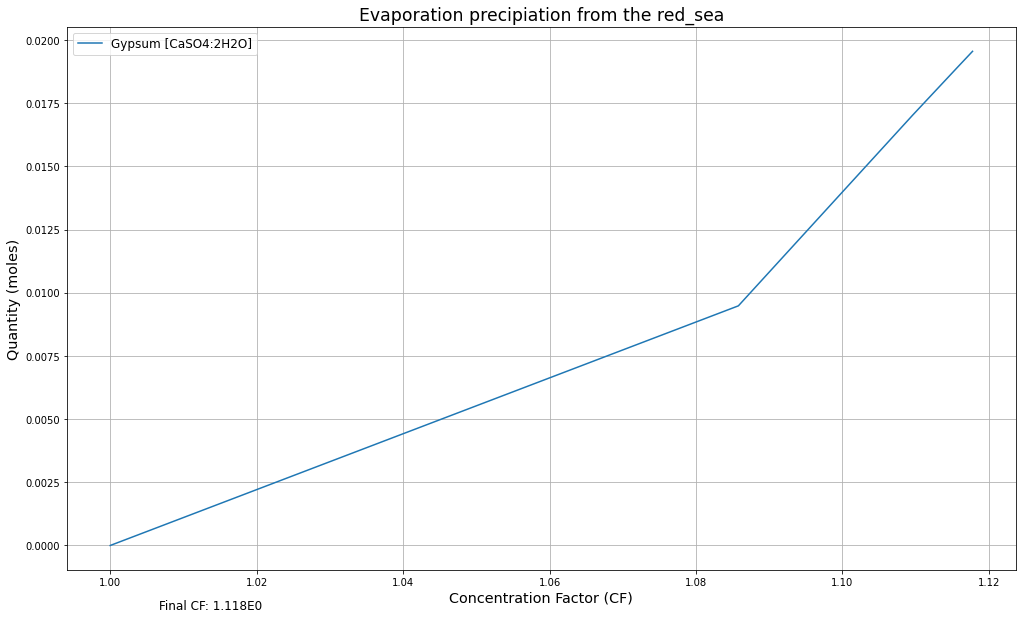

,Gypsum (mol)
Concentration Factor (CF),
1.00000E0,0.000000
1.08578E0,0.009480
1.10959E0,0.017027
1.11571E0,0.018918
1.11725E0,0.019392
1.11763E0,0.019510
1.11773E0,0.019539
1.11775E0,0.019547
1.11776E0,0.019549


In [3]:
# run the ROSS model
%run ../../../rosspy/core.py
ross = ROSSPkg(verbose = False)

# initial parameters
phreeqc_path = 'C:\\Program Files\\USGS\\phreeqc-3.6.2-15100-x64'
database_selection = 'pitzer'
simulation_title = 'test'
water_selection = 'red_sea'
permeate_approach = 'linear_permeate'
simulation_perspective = 'all_distance'
simulation_type = 'evaporation'
simulation_time = 200

# create the input file
ross.define_general(database_selection, simulation_type = simulation_type)
ross.transport(simulation_time, simulation_perspective, )
ross.reaction(permeate_approach)
ross.solutions(water_selection)
ross.equilibrium_phases()
ross.selected_output()
ross.export()

# execute and process the input file
raw_data = ross.execute()
evaporation_data = ross.process_selected_output()
display(evaporation_data)

## Desalination

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 14 significant figures requested from number with only 13 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))



Estimated completion in 3.80E1 seconds by 2021-10-26 16:17:45.222648 local time.
C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PHREEQC\ROSS\rosspy\databases\pitzer.dat


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


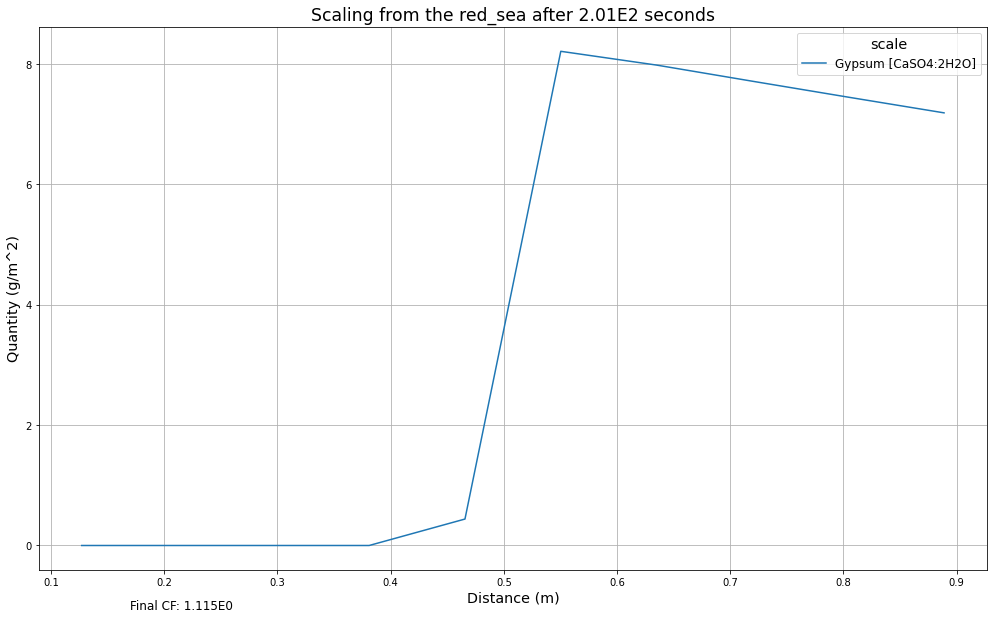

,Gypsum (g/m^2)
Distance (m),
1.27E-1,0.00E0
2.12E-1,0.00E0
2.96E-1,0.00E0
3.81E-1,0.00E0
4.66E-1,4.39E-1
5.50E-1,8.21E0
6.35E-1,7.98E0
7.20E-1,7.71E0
8.04E-1,7.45E0


In [21]:
# run the ROSS model
%run ../../../rosspy/core.py
ross = ROSSPkg(verbose = False)

# initial parameters
phreeqc_path = 'C:\\Program Files\\USGS\\phreeqc-3.6.2-15100-x64'
database_selection = 'pitzer'
simulation_title = 'test'
water_selection = 'red_sea'
permeate_approach = 'linear_permeate'
simulation_perspective = 'all_distance'
simulation_type = 'transport'
simulation_time = 200

# create the input file
ross.define_general(database_selection, simulation_type = simulation_type)
ross.transport(simulation_time, simulation_perspective, )
ross.reaction(permeate_approach)
ross.solutions(water_selection)
ross.equilibrium_phases()
ross.selected_output()
ross.export()

# execute and process the input file
raw_data = ross.execute()
desalination_data = ross.process_selected_output()
display(desalination_data)

# Comparing the scaling predictions

In [24]:
import pandas
import re

# define the parameters of the system
active_sqr_meters = 37
gypsum_mw = 172.17116

# convert the desalination data to moles
refined_desalination_data = pandas.DataFrame()
for column in desalination_data:
    for index, row in desalination_data.iterrows():
        refined_desalination_data.at[index, column] = float(row[column]) * active_sqr_meters / gypsum_mw
    refined_desalination_data.rename(columns = {column: re.sub('(g/m\^2)', 'mol',column)}, inplace = True)
        
# contrast the desalination and evaporation data
print('refined_desalination_data')
display(refined_desalination_data)
print('\n\nevaporation_data')
display(evaporation_data)

refined_desalination_data


,Gypsum (mol)
1.27E-1,0.000000
2.12E-1,0.000000
2.96E-1,0.000000
3.81E-1,0.000000
4.66E-1,0.094342
5.50E-1,1.764349
6.35E-1,1.714921
7.20E-1,1.656898
8.04E-1,1.601023
8.89E-1,1.545148




evaporation_data


,Gypsum (mol)
Concentration Factor (CF),
1.00000E0,0.000000
1.08578E0,0.009480
1.10959E0,0.017027
1.11571E0,0.018918
1.11725E0,0.019392
1.11763E0,0.019510
1.11773E0,0.019539
1.11775E0,0.019547
1.11776E0,0.019549
